In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 5000 # sample rate in Hertz
freq1 = 50.0 # frequency of first sine wave
freq2 = 100.0 # frequency of second sine wave
amplitude1 = 10 # amplitude of first wave
amplitude2 = 5 # amplitude of second wave
numPeriods = 2 # number of periods of the sine waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [4]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, numPeriods, numSamples)

In [5]:
x

array([  0.00000000e+00,   2.00020002e-04,   4.00040004e-04, ...,
         1.99959996e+00,   1.99979998e+00,   2.00000000e+00])

In [6]:
len(x)

10000

In [7]:
f1 = lambda x: amplitude1*np.sin(freq1*2*np.pi*x)

In [8]:
f2 = lambda x: amplitude2*np.sin(freq2*2*np.pi*x)

In [9]:
sampled_f1 = [f1(i) for i in x]

In [10]:
sampled_f1

[0.0,
 0.62796790942091285,
 1.2534570208228748,
 1.8739983208264468,
 2.4871423267079904,
 3.0904687553219667,
 3.6815960767627969,
 4.2581909150548105,
 4.8179772587626246,
 5.3587454451646233,
 5.8783608825260121,
 6.3747724760417492,
 6.8460207241893336,
 7.2902454535324832,
 7.7056931614438415,
 8.0907239377625597,
 8.443817938064651,
 8.763581382994003,
 9.0487520599726619,
 9.2982043055733161,
 9.5109534488869301,
 9.686159698346021,
 9.823131456661061,
 9.9213280507847994,
 9.9803618661284439,
 9.9999998766052673,
 9.9801645644619956,
 9.9209342262671445,
 9.8225426638484468,
 9.6853782613993378,
 9.5099824523974874,
 9.2970475823869307,
 9.0474141760601405,
 8.7620676194277429,
 8.4421342701724864,
 8.0888770115411628,
 7.7036902673247631,
 7.2880944976043915,
 6.8437301969900641,
 6.3723514190433237,
 5.8758188524449473,
 5.3560924762383912,
 4.8152238231411921,
 4.2553478814635639,
 3.6786746676000992,
 3.0874805023605942,
 2.4840990255754067,
 1.870911984443552,
 1.25033983

In [11]:
len(sampled_f1)

10000

In [12]:
sampled_f2 = [f2(i) for i in x]

In [13]:
sampled_f2

[0.0,
 0.6267285104114374,
 1.2435711633539952,
 1.8407980383813984,
 2.4089886293813123,
 2.939180441263006,
 3.4230103620946668,
 3.8528465807219208,
 4.2219089690323255,
 4.5243760299863309,
 4.755476724443465,
 4.9115657283305305,
 4.9901809330642219,
 4.9900822822309978,
 4.9112713319242234,
 4.7549912261987437,
 4.5237070880300703,
 4.2210671350862432,
 3.8518451336623816,
 3.4218650984950321,
 2.9379094262224736,
 2.4076119115705961,
 1.8393373338000496,
 1.2420495127877034,
 0.62516991599249505,
 -0.0015709533962917142,
 -0.62828704296238336,
 -1.2450926911601803,
 -1.8422585612469231,
 -2.4103651093868264,
 -2.9404511661600323,
 -3.4241552877891452,
 -3.8538476474446837,
 -4.2227503862093476,
 -4.5250445253152574,
 -4.7559617532475666,
 -4.9118596398877701,
 -4.9902790912878157,
 -4.9899831387978821,
 -4.910976450697909,
 -4.7545052585613288,
 -4.5230376995125106,
 -4.220224884454205,
 -3.850843306364923,
 -3.4207194971032981,
 -2.9366381211639063,
 -2.4062349560905743,
 -1.83

In [14]:
sampled_fcomb = [(f1(i)+f2(i)) for i in x]

In [15]:
len(sampled_fcomb)

10000

(-25, 25)

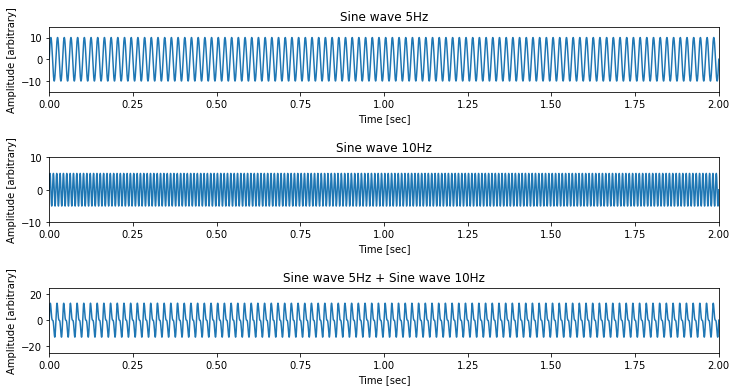

In [16]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)

plt.subplot(311)
plt.plot(x, sampled_f1)
plt.title('Sine wave 5Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 2)
plt.ylim(-15, 15)

plt.subplot(312)
plt.plot(x, sampled_f2)
plt.title('Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 2)
plt.ylim(-10, 10)

plt.subplot(313)
plt.plot(x, sampled_fcomb)
plt.title('Sine wave 5Hz + Sine wave 10Hz')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, 2)
plt.ylim(-25, 25)

In [17]:
fft_output = np.fft.rfft(sampled_fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(numSamples//2+1)]

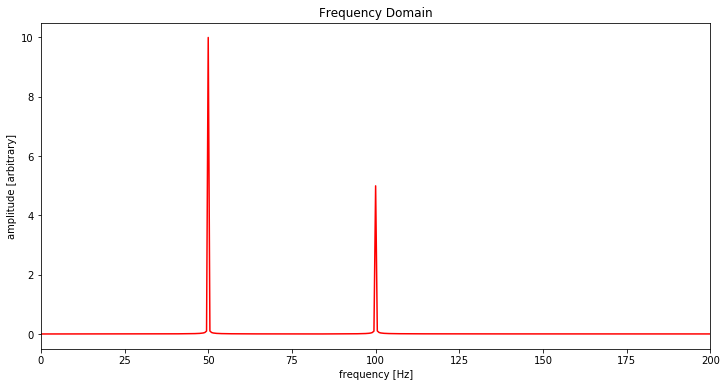

In [18]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.xlim(0, 200)
plt.plot(frequencies, magnitude, 'r')


In [19]:
sampled_fcomb

[0.0,
 1.2546964198323503,
 2.49702818417687,
 3.7147963592078455,
 4.8961309560893032,
 6.0296491965849732,
 7.1046064388574637,
 8.1110374957767313,
 9.0398862277949501,
 9.8831214751509542,
 10.633837606969477,
 11.28633820437228,
 11.836201657253556,
 12.280327735763482,
 12.616964493368066,
 12.845715163961303,
 12.967525026094721,
 12.984648518080245,
 12.900597193635043,
 12.720069404068347,
 12.448862875109404,
 12.093771609916617,
 11.66246879046111,
 11.163377563572503,
 10.60553178212094,
 9.9984289232089765,
 9.3518775214996115,
 8.6758415351069651,
 7.9802841026015239,
 7.2750131520125114,
 6.5695312862374546,
 5.8728922945977855,
 5.1935665286154569,
 4.5393172332183953,
 3.9170897448572291,
 3.3329152582935961,
 2.7918306274369931,
 2.2978154063165759,
 1.853747058192182,
 1.4613749683454147,
 1.1213135938836185,
 0.83305477672588069,
 0.59499893868698717,
 0.40450457509864091,
 0.25795517049680106,
 0.15084238119668791,
 0.077864069484832488,
 0.033035536796481413,
 0.0

In [20]:
len(sampled_fcomb)

10000

In [21]:
magnitude

[1.0389609588573751e-15,
 2.4981464904905666e-05,
 4.9975677066527398e-05,
 7.4995408113052246e-05,
 0.00010005347856086998,
 0.0001251627824979647,
 0.00015033631257141948,
 0.00017558718541741596,
 0.00020092866757812362,
 0.0002263742020846122,
 0.00025193743577288271,
 0.00027763224746997619,
 0.00030347277720118551,
 0.0003294734565335938,
 0.00035564904018451309,
 0.00038201463910238166,
 0.00040858575514626712,
 0.0004353783175486762,
 0.00046240872135797718,
 0.000489693868097323,
 0.00051725120881157538,
 0.00054509878983213084,
 0.00057325530144241535,
 0.0006017401298198708,
 0.00063057341252109741,
 0.00065977609795667277,
 0.0006893700091178326,
 0.00071937791215449451,
 0.000749823590160999,
 0.00078073192280945689,
 0.00081212897234964412,
 0.00084404207668803985,
 0.00087649995027754967,
 0.00090953279381989947,
 0.00094317241320643818,
 0.00097745234951492543,
 0.001012408020532384,
 0.0010480768755525996,
 0.0010844985647993812,
 0.001121715125205658,
 0.0011597711844

In [22]:
len(magnitude)

5001

In [23]:
frequencies

[0.0,
 0.5,
 1.0,
 1.4999999999999998,
 2.0,
 2.5,
 2.9999999999999996,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 5.999999999999999,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 11.999999999999998,
 12.5,
 13.0,
 13.5,
 14.0,
 14.499999999999998,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 23.999999999999996,
 24.5,
 25.0,
 25.500000000000004,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 28.999999999999996,
 29.5,
 30.0,
 30.500000000000004,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.50000000000001,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.49999999999999,
 47.0,
 47.5,
 47.99999999999999,
 48.5,
 49.0,
 49.50000000000001,
 50.0,
 50.5,
 51.00000000000001,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.49999999999999,
 57.0,
 57.5,
 5

In [24]:
len(frequencies)

5001

In [25]:
print ('Opening data files...')
dataFile = open('2sineXHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('2sineXHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('2sineXHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, sampled_fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([sampled_fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...
